# Predicting heart disease using machine learning

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Preparing the Tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

## Load Data

In [98]:
df = pd.read_csv("./data/heart.csv")
df.shape #(rows, columns) or (entries, features)

(1025, 14)

## Data Analysis

In [99]:
df.head() # Shows first 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [100]:
df.tail() # Shows last 5 data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [101]:
df['target'].value_counts() # 1: heart disease, 0: not heart disease

1    526
0    499
Name: target, dtype: int64

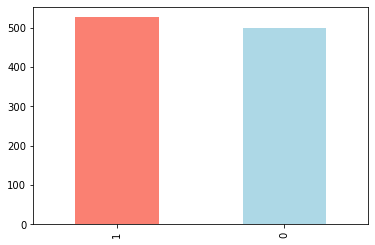

In [102]:
#Ploting the target values in bar graph
df['target'].value_counts().plot(kind = 'bar', color=['salmon', 'lightblue']);

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [104]:
# Checking whether there is any missing value
df.isna().sum() # No missing value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [105]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to Sex

In [106]:
df.sex.value_counts() # 1: Male, 0: Female

1    713
0    312
Name: sex, dtype: int64

In [107]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


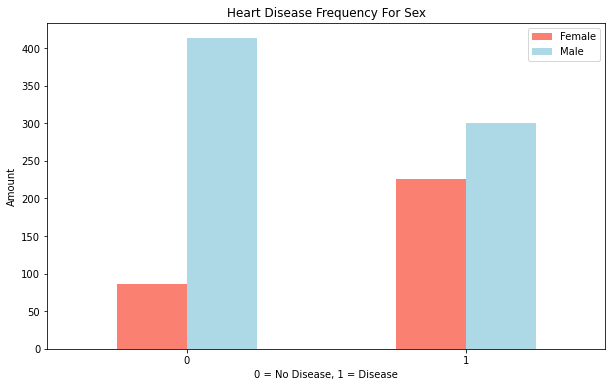

In [108]:
# Crosstab bar graph
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['salmon','lightblue'])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel('Amount')
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease 

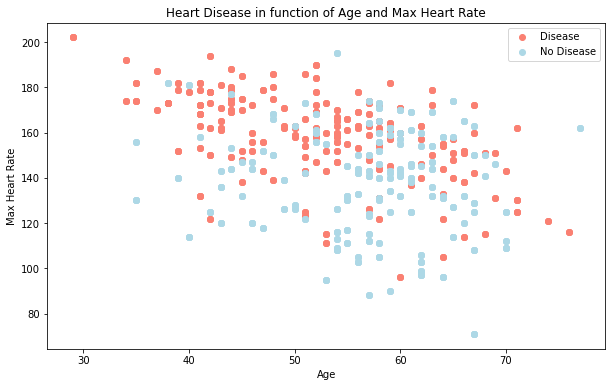

In [109]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

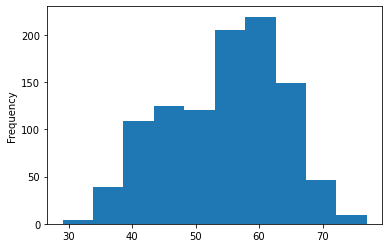

In [110]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [111]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


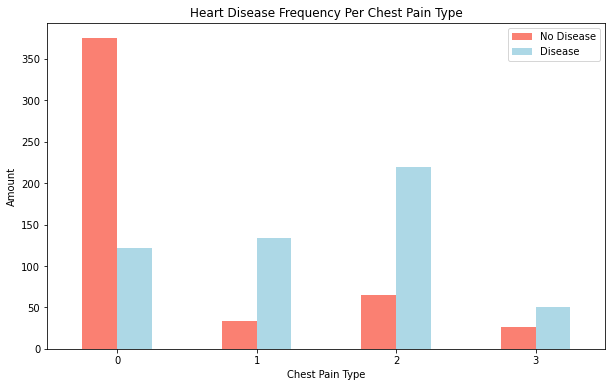

In [112]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [113]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [114]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


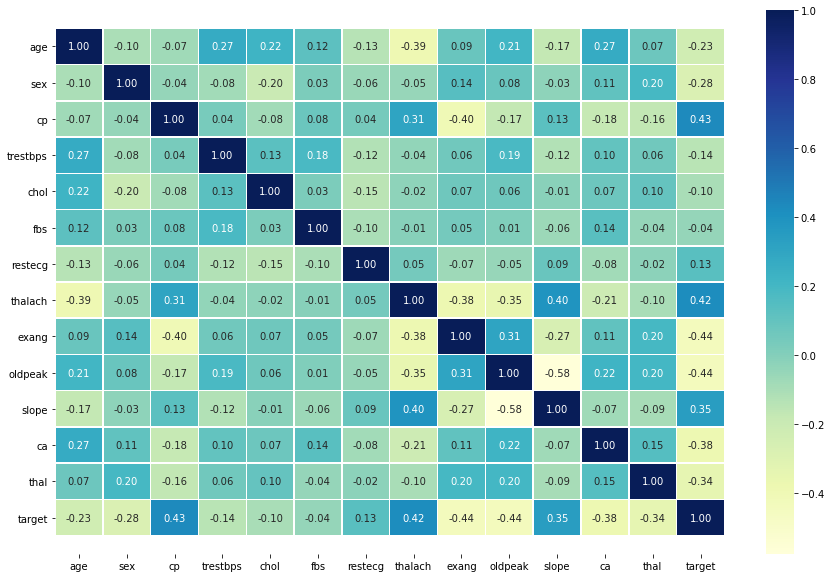

In [115]:
# Ploting correaltion matrix on a graph
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# Phase 2
From the phase 2 onwards, we will work on the framingham dataset.

Attributes of framingham dataset:
- sex: male(0) or female(1);(Nominal)
- age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
- currentSmoker: whether or not the patient is a current smoker (Nominal)
- cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
- BPMeds: whether or not the patient was on blood pressure medication (Nominal)
- prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
- prevalentHyp: whether or not the patient was hypertensive (Nominal)
- diabetes: whether or not the patient had diabetes (Nominal)
- totChol: total cholesterol level (Continuous)
- sysBP: systolic blood pressure (Continuous)
- diaBP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
- glucose: glucose level (Continuous)
- 10 year risk of coronary heart disease CHD (binary: “1” means “Yes”, “0” means “No”) - Target Variable

###  Importing Dataset

In [116]:
#importing data set
df=pd.read_csv("./data/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [117]:
df.shape # showing (rows,colums)

(4240, 16)

Our dataset consist of <b>4240</b> entries and <b>15</b> attributes/features and <b>1</b> target/output.

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


From the above cell we can see that there are some missing values in our dataset which will be fixed during data cleaning process.

## Dataset Cleaning

In [23]:
# Checking for the missing values in the dataset
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In our dataset there are many missing values in the features like education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose. We can fill the nan value in glucose with the mode value of all entries and droping rest of all the nan dataset.

In [24]:
df['glucose'].fillna(df['glucose'].mode()[0], inplace=True)

In [25]:
df.dropna(inplace=True)

In [26]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [27]:
df.shape

(3989, 16)

## Removing Outliers

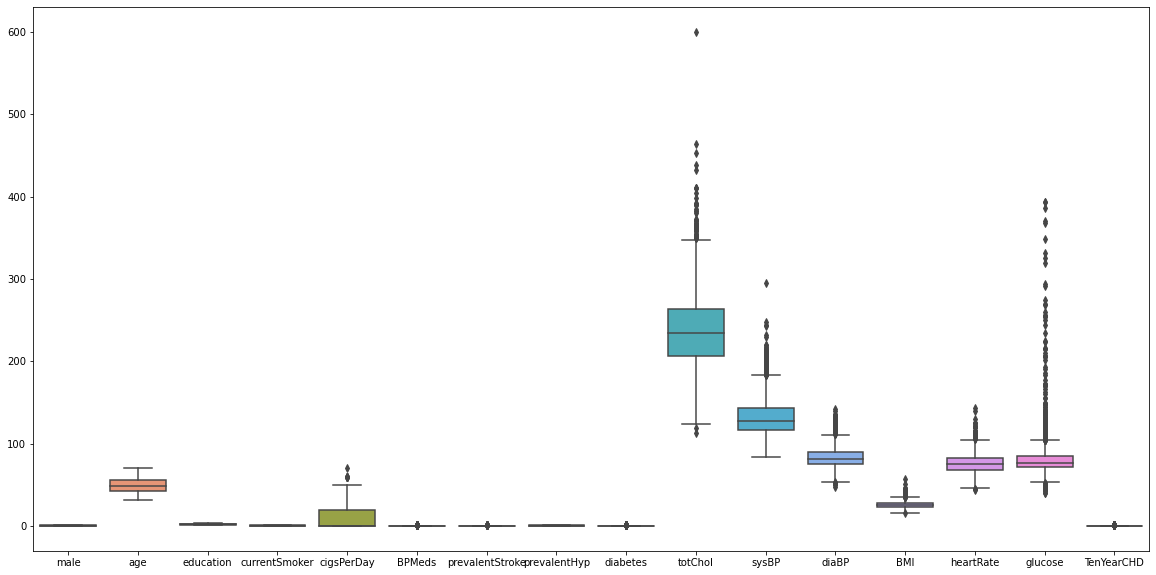

In [35]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df)
plt.show()

There are some removable outliers in `totChol` and `sysBP`. Rest of the outliers are important and should not be removed.

In [39]:
df['totChol'].max() #Outlier present in `totChol`

600.0

In [41]:
df['sysBP'].max() # Outlier in present in 'sysBP'

295.0

In [46]:
# removing outliers entries from the dataset
df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(3987, 16)

## Exploratory Data Analysis

In [47]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000,3987.000000
mean,0.433409,49.469526,1.982694,0.491347,9.027840,0.029345,0.005518,0.309255,0.025082,236.502132,132.177452,82.849887,25.769488,75.869325,81.272385,0.148733
std,0.495608,8.531325,1.020832,0.499988,11.918332,0.168794,0.074087,0.462244,0.156392,43.653337,21.793408,11.854644,4.075145,12.086398,22.954842,0.355870
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [48]:
df['TenYearCHD'].value_counts()

0    3394
1     593
Name: TenYearCHD, dtype: int64

The dataset consist of `3394` entries with '0'(no patient with heart disease) and `593` entries with '1' (patient with disease). Since our dataset is imbalanced we have to balance the dataset later.

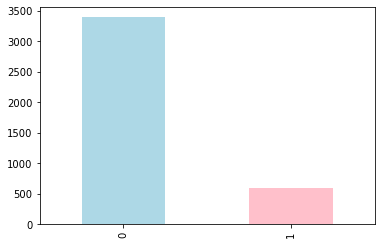

In [29]:
import matplotlib.pyplot as plt

#Ploting the TenYearCHD values in bar graph
df['TenYearCHD'].value_counts().plot(kind='bar',color=['lightblue','pink']);

From the above bar graph, we can see that there are many 0 values than 1, i.e dataset contain more false values (no disease) than the true value (disease).

In [30]:
#making corelation matrix
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.022696,0.013049,0.200757,0.325601,-0.050022,-0.003622,0.007670,0.016900,-0.068703,-0.033434,0.058723,0.079214,-0.115969,0.008608,0.091245
age,-0.022696,1.000000,-0.161089,-0.213671,-0.190600,0.128447,0.045064,0.304496,0.104776,0.269799,0.389814,0.206171,0.134673,-0.008337,0.115845,0.229725
education,0.013049,-0.161089,1.000000,0.018365,0.006507,-0.010113,-0.028570,-0.081464,-0.034756,-0.023161,-0.128237,-0.063298,-0.136251,-0.058110,-0.031169,-0.054168
currentSmoker,0.200757,-0.213671,0.018365,1.000000,0.770872,-0.048914,-0.032530,-0.105762,-0.040224,-0.048890,-0.130899,-0.109851,-0.164975,0.052285,-0.051922,0.022234
cigsPerDay,0.325601,-0.190600,0.006507,0.770872,1.000000,-0.043981,-0.033951,-0.066930,-0.036207,-0.026404,-0.087943,-0.051265,-0.087834,0.068029,-0.051245,0.059124
BPMeds,-0.050022,0.128447,-0.010113,-0.048914,-0.043981,1.000000,0.127485,0.259582,0.047643,0.086179,0.260403,0.195993,0.103018,0.016321,0.054261,0.089867
prevalentStroke,-0.003622,0.045064,-0.028570,-0.032530,-0.033951,0.127485,1.000000,0.067277,0.009545,0.007987,0.055160,0.049279,0.031398,-0.012108,0.016471,0.044834
prevalentHyp,0.007670,0.304496,-0.081464,-0.105762,-0.066930,0.259582,0.067277,1.000000,0.075005,0.164943,0.693882,0.615489,0.304473,0.151198,0.084334,0.176236
diabetes,0.016900,0.104776,-0.034756,-0.040224,-0.036207,0.047643,0.009545,0.075005,1.000000,0.044545,0.101041,0.051252,0.082777,0.051465,0.609132,0.089297
totChol,-0.068703,0.269799,-0.023161,-0.048890,-0.026404,0.086179,0.007987,0.164943,0.044545,1.000000,0.214536,0.171537,0.123195,0.088375,0.049247,0.082552


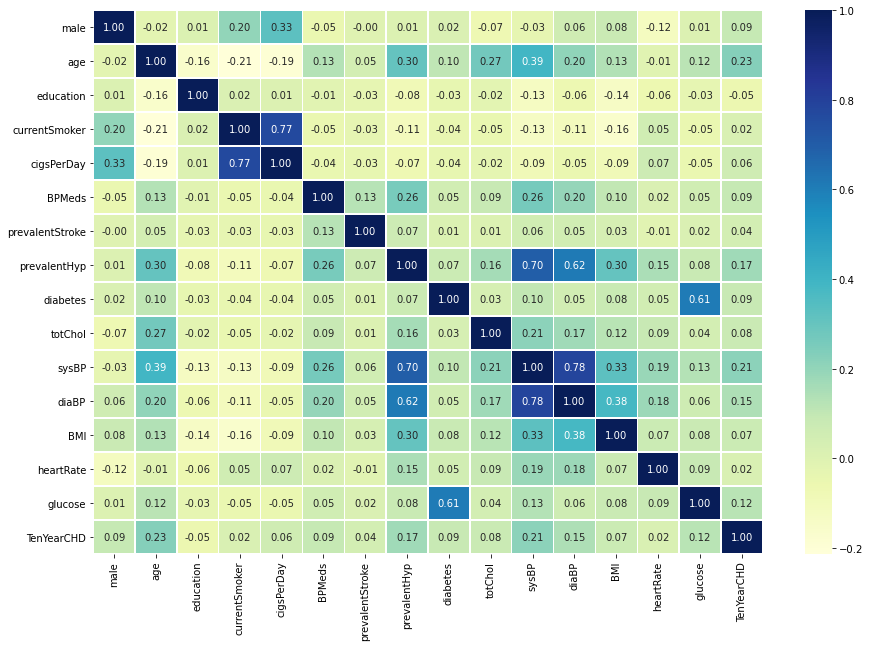

In [50]:
# Ploting correlation matrix on heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

The above heatmap plot tell us about the relation of each features of the dataset with each other. From the heatmap it can be seen that there is not any any corelation of the `education` feature with the heart disease.

In [53]:
df.drop(labels=['education'], axis = 1, inplace = True)

In [56]:
cat_features = ['male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for feature in cat_features:
    print('---------------------------')
    print('Feature: '+ feature)
    print(df[feature].value_counts())
    print('---------------------------')

---------------------------
Feature: male
0    2259
1    1728
Name: male, dtype: int64
---------------------------
---------------------------
Feature: currentSmoker
0    2028
1    1959
Name: currentSmoker, dtype: int64
---------------------------
---------------------------
Feature: BPMeds
0.0    3870
1.0     117
Name: BPMeds, dtype: int64
---------------------------
---------------------------
Feature: prevalentStroke
0    3965
1      22
Name: prevalentStroke, dtype: int64
---------------------------
---------------------------
Feature: prevalentHyp
0    2754
1    1233
Name: prevalentHyp, dtype: int64
---------------------------
---------------------------
Feature: diabetes
0    3887
1     100
Name: diabetes, dtype: int64
---------------------------


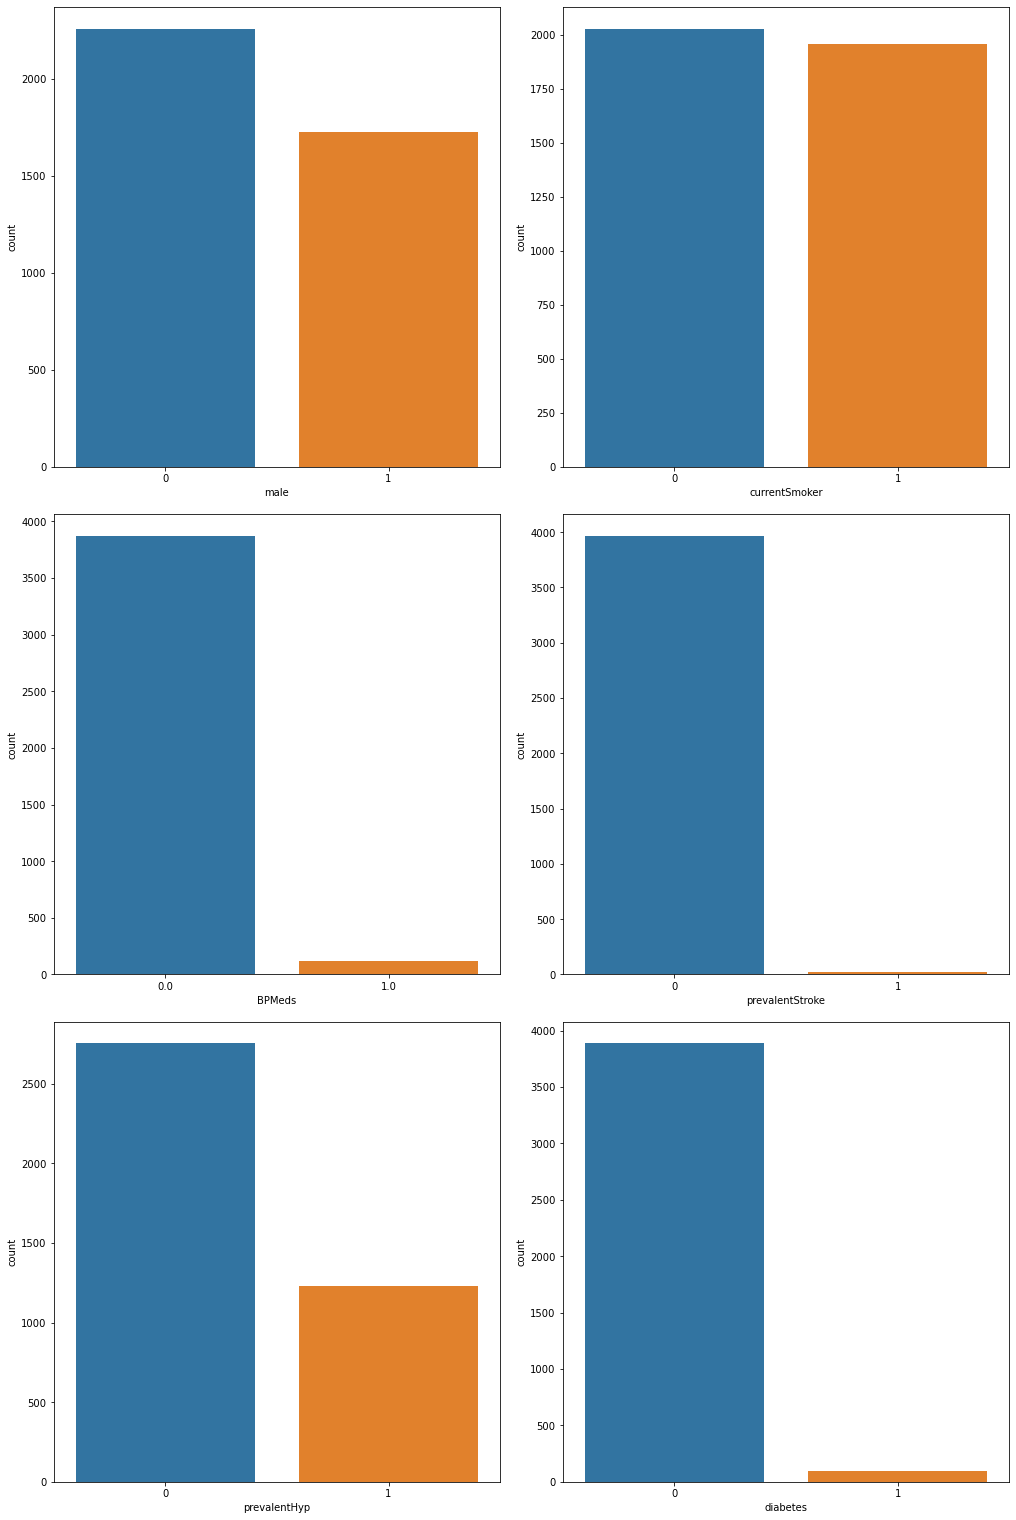

In [67]:
# Graph Plot
num_plots = len(cat_features)
total_cols = 2
total_rows = 3
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(cat_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=df, ax=axs[row][pos])

Among the categorical features:

- `BPmeds`, `prevalentStroke` and `diabetes` are highly imbalanced.
- The number of Smokers and non-Smokers in currentSmoker is almost the same

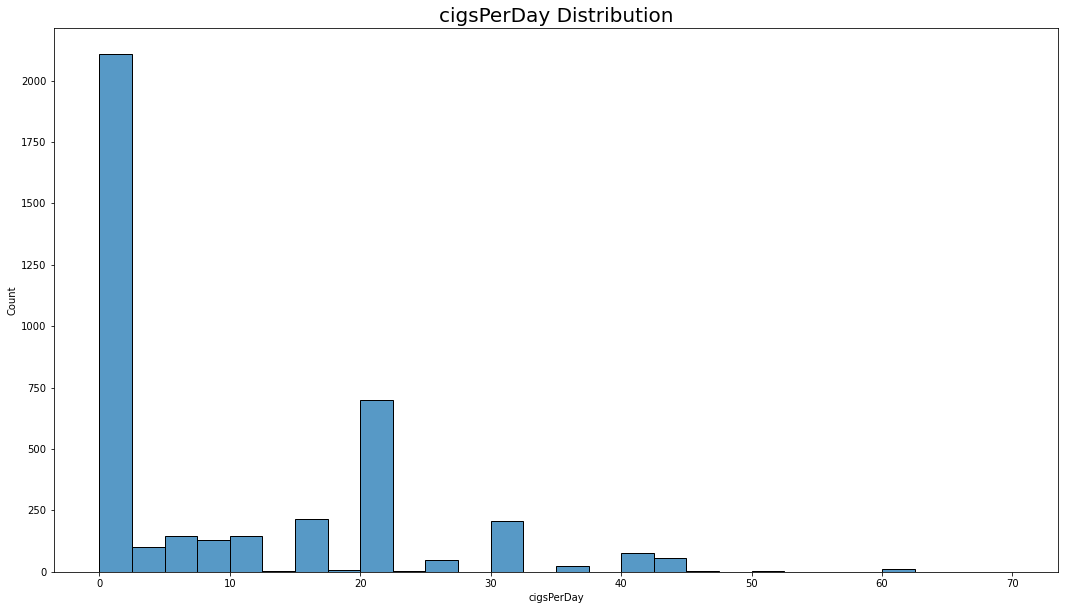

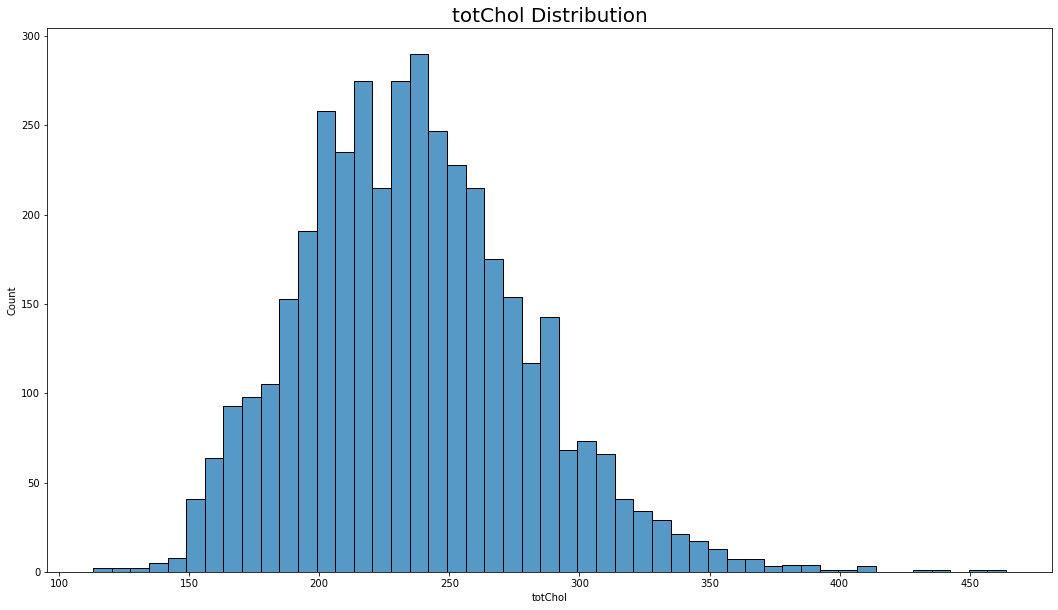

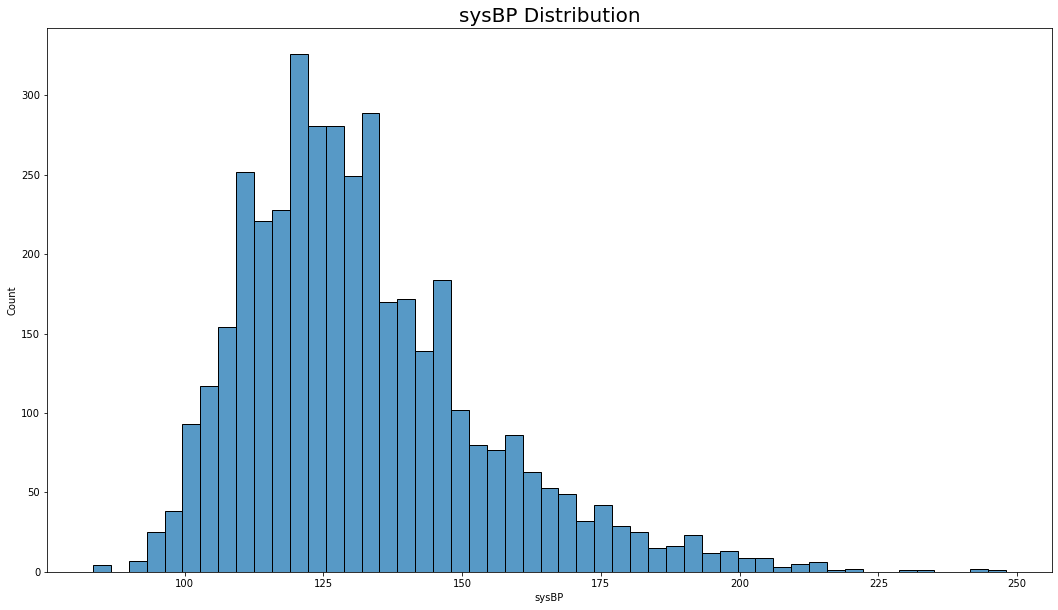

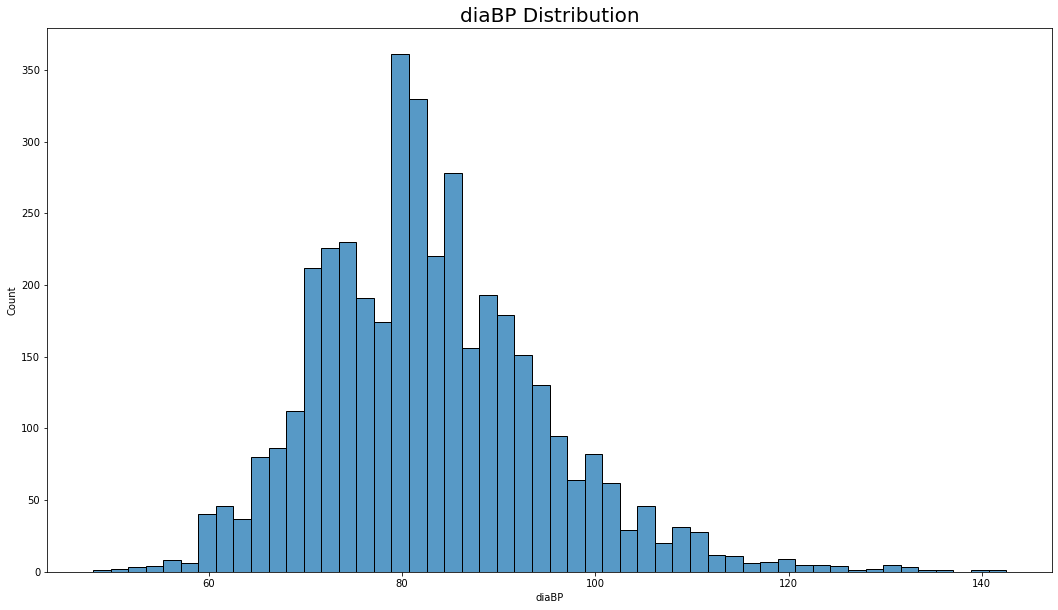

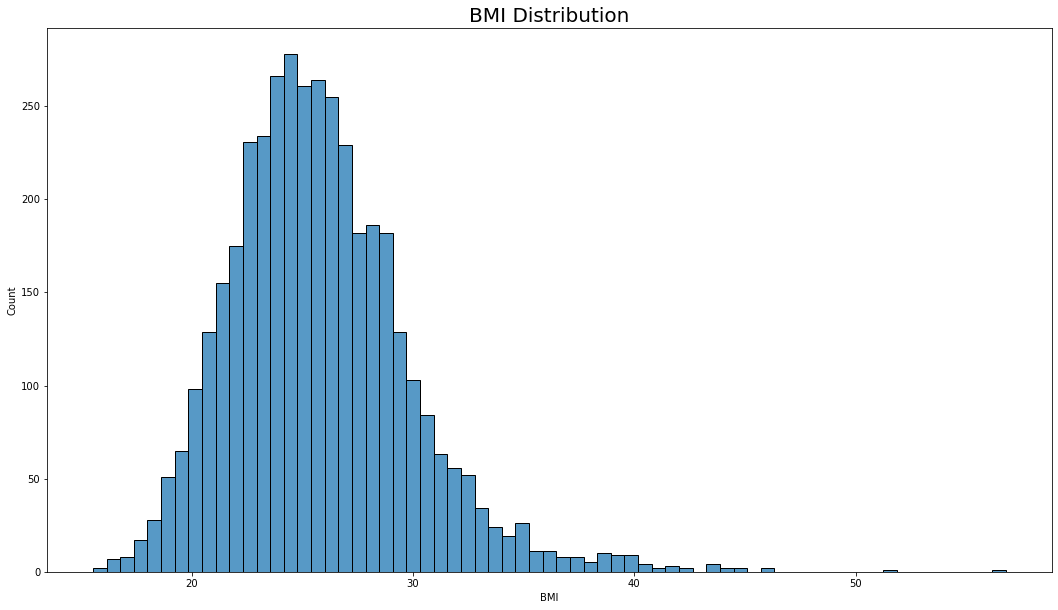

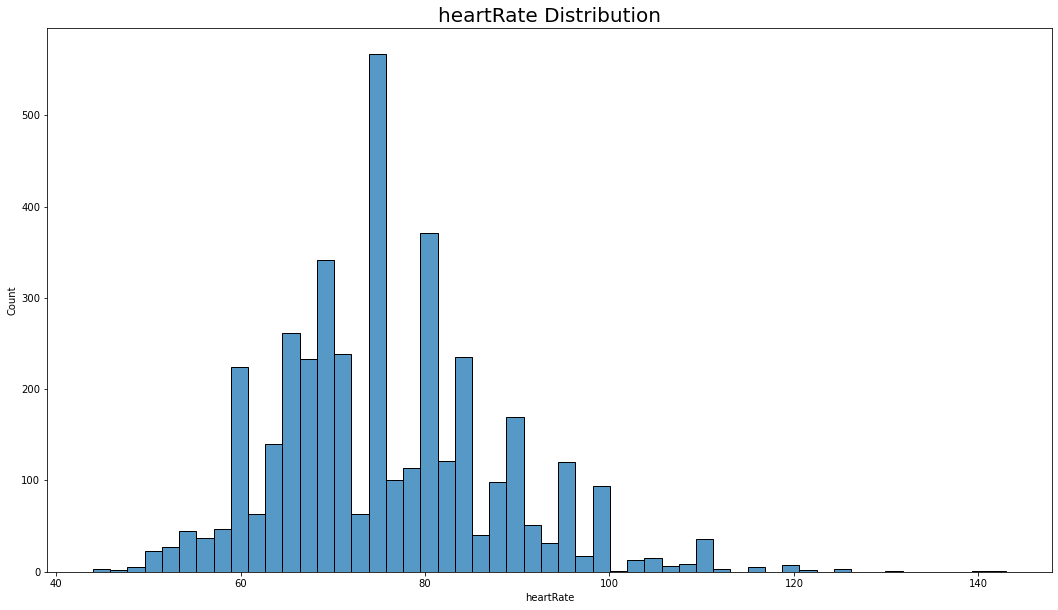

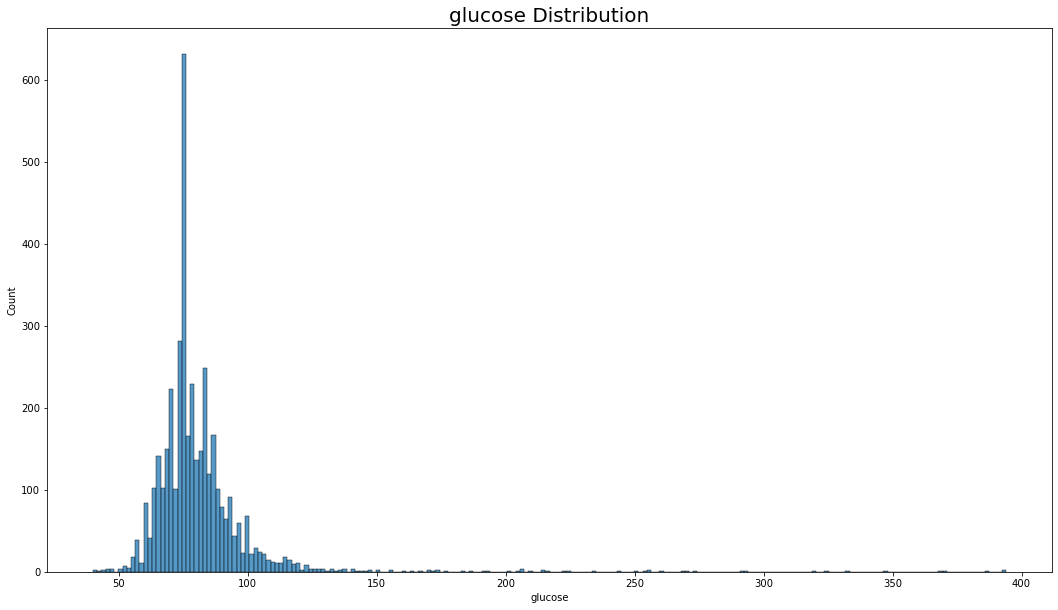

In [72]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.histplot(df[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

- `totChol`, `sysBP`, `diaBP` and `BMI` has an uniform distribution and the rest are unevenly distributed
- `cigsPerDay` has a highly uneven distribution with the most data present in 0
- `cigsPerDay` and `sysBP` shows quite a bit and slight right skewness respectively.

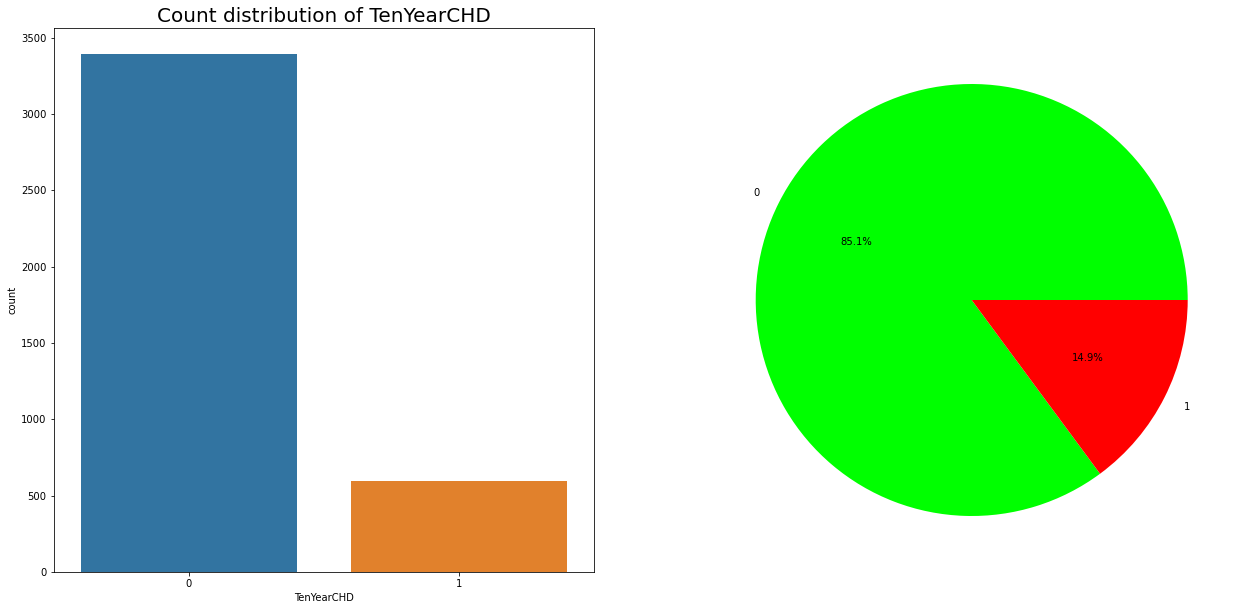

In [73]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=df)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

### Which gender has more risk of heart disease

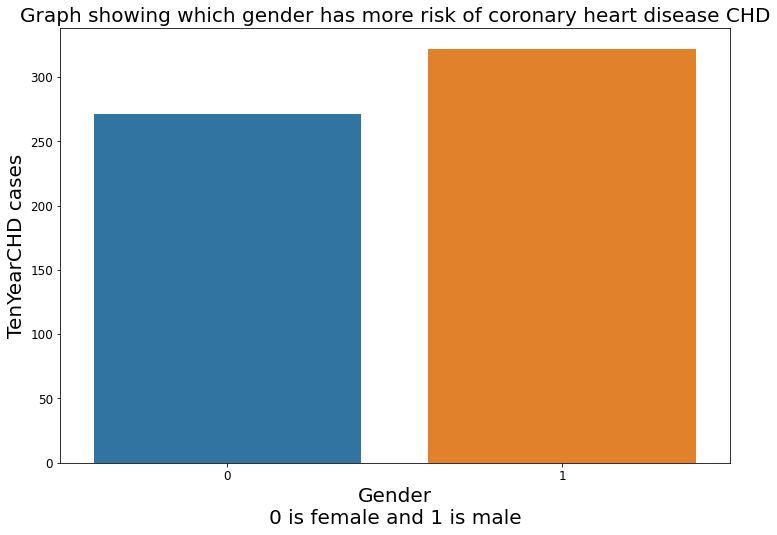

In [80]:
graph = df.groupby("male", as_index=False).TenYearCHD.sum()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph["male"], y=graph["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

Male has slightly more cases than female.

### Which age has more smokers

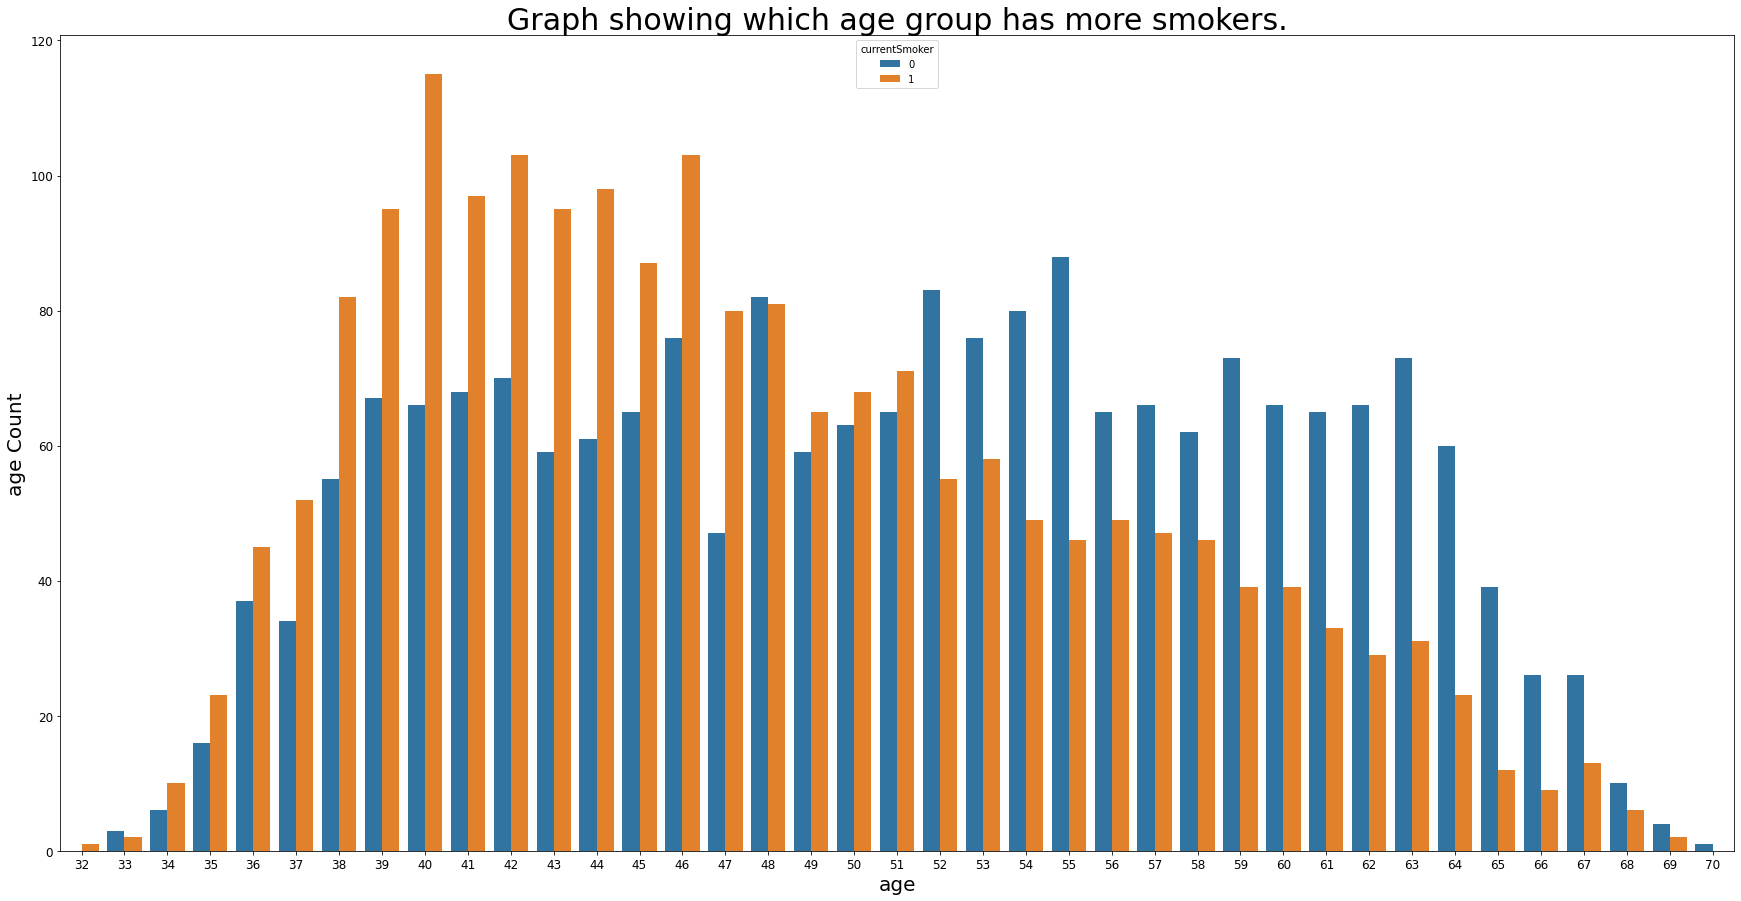

In [81]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=df,hue="currentSmoker")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

- Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
- No currentSmokers observed below the age of 32
- maximum age for a currentSmokers is 70

### Relation between cigsPerDay and risk of coronary heart disease

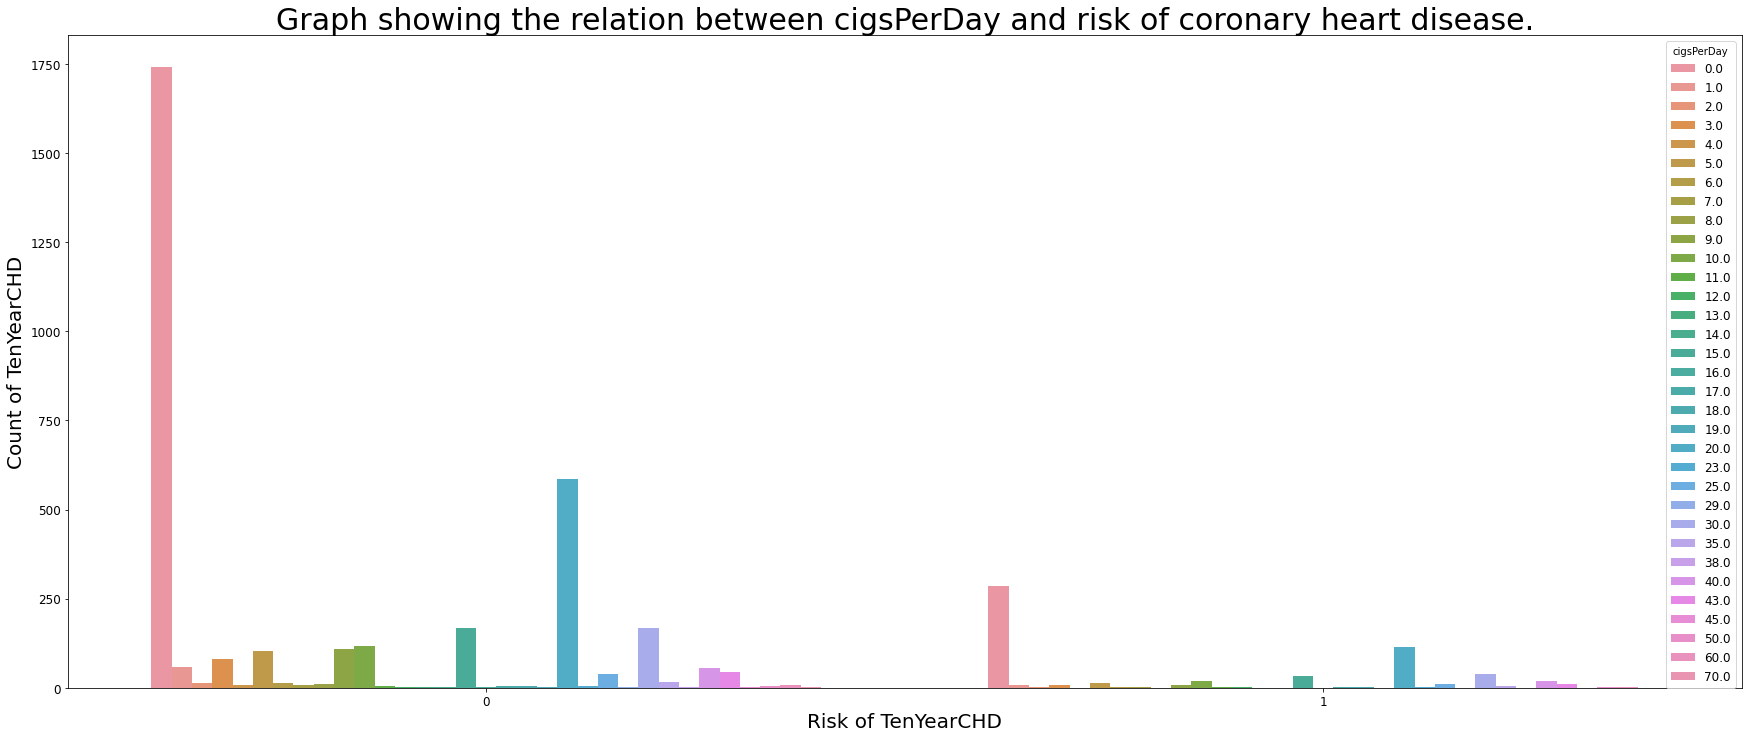

In [83]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=df,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

- Low cigsPerDay comes with lower risk of CHD.
- Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
- Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of heart disease

### Relation between age and totChol


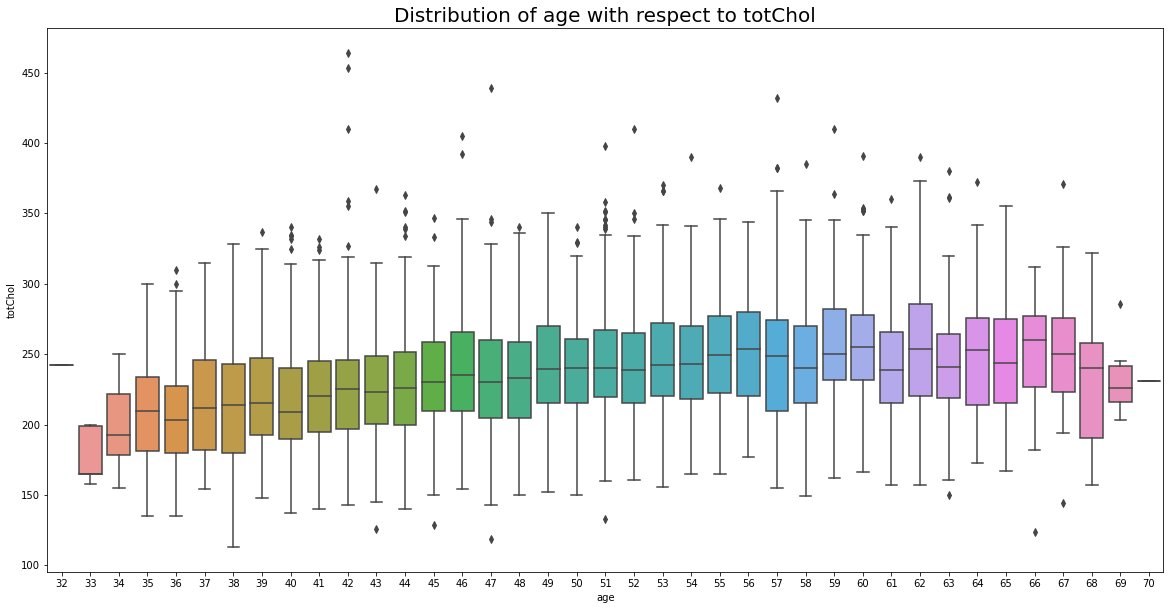

In [86]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=df)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

### Relationship between age and cigsPerDay, totChol, glucose

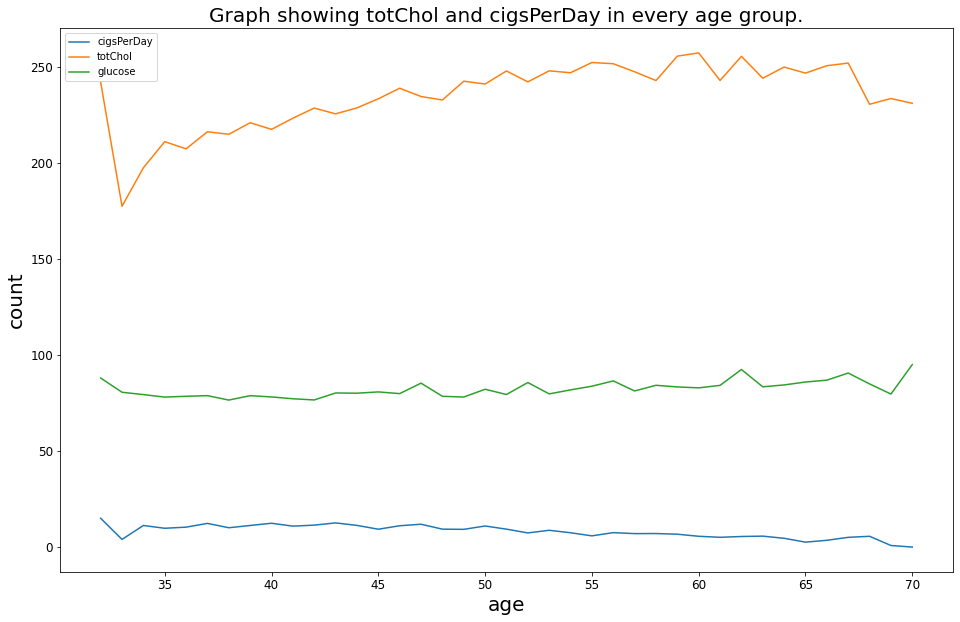

In [88]:
graph_1 = df.groupby("age").cigsPerDay.mean()
graph_2 = df.groupby("age").totChol.mean()
graph_3 = df.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_1, label="cigsPerDay")
sns.lineplot(data=graph_2, label="totChol")
sns.lineplot(data=graph_3, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12);

- There is a minor relation between totChol and glucose.
- totChol has a steep, linear and inverse graph for lower ranges of age
- cigsPerDay has a fairly parallel relationship with age

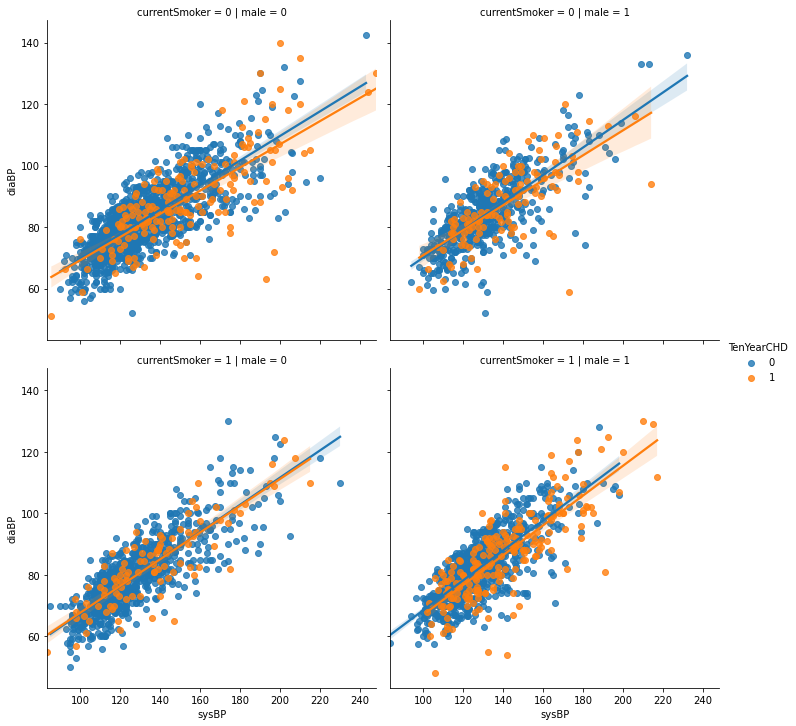

In [91]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot(x='sysBP', y='diaBP', 
           data=df,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()

The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line

## Resampling imbalanced dataset by oversampling positive cases

In [94]:
from sklearn.utils import resample

target1=df[df['TenYearCHD']==1]
target0=df[df['TenYearCHD']==0]

target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

target=pd.concat([target0,target1])

target['TenYearCHD'].value_counts()

1    3394
0    3394
Name: TenYearCHD, dtype: int64

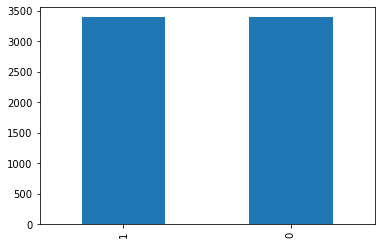

In [96]:
target['TenYearCHD'].value_counts().plot(kind='bar');